# Calculations related to mitigation for initial WSU

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import vstack, QTable
import astropy.units as u
import pickle 
from importlib import reload
import re

# read in the data

In [2]:
# fix up custom units
gvis = u.def_unit('Gvis',namespace=globals())
u.add_enabled_units([gvis])

In [3]:
wsu_all = QTable.read('data/wsu_datarates_mit_per_mous_initial_goal_20240828.ecsv')


## Make a plot

Text(0.5, 1.0, '12m+7m data')

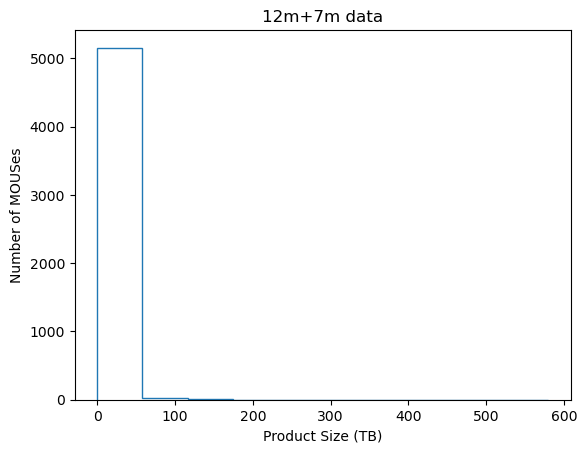

In [7]:
plt.hist(wsu_all['wsu_productsize_early_stepped2'].to('TB').value,histtype='step',align='mid')
plt.xlabel('Product Size (TB)')
plt.ylabel('Number of MOUSes')
plt.title('12m+7m data')

Text(0.5, 1.0, '12m+7m data')

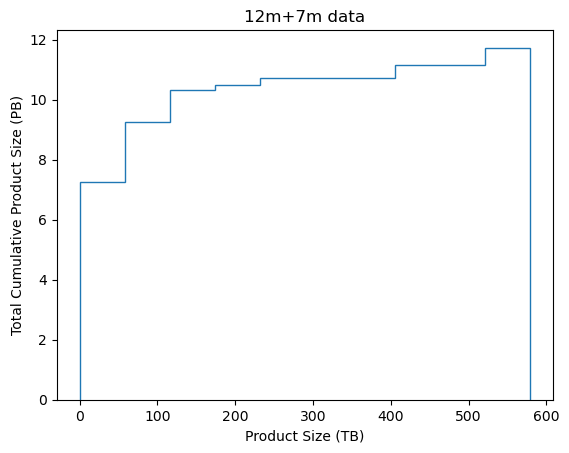

In [8]:
## by setting the weights to the value in PB, we can get the cumulative sum over all the data. 
## Note that the max value agrees with the 11.72PB calculated earlier.
plt.hist(wsu_all['wsu_productsize_early_stepped2'].to('TB').value,
        weights=wsu_all['wsu_productsize_early_stepped2'].to('PB').value, 
        cumulative=True,density=False,histtype='step',align='mid')
plt.xlabel('Product Size (TB)')
plt.ylabel('Total Cumulative Product Size (PB)')
plt.title('12m+7m data')

Text(0.5, 1.0, '7m data only')

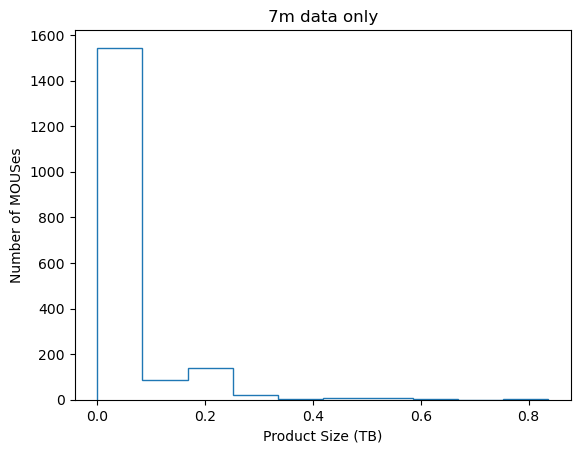

In [9]:
## plotting only 7m data
idx = wsu_all['array'] == '7m'
plt.hist(wsu_all[idx]['wsu_productsize_early_stepped2'].to('TB').value,histtype='step',align='mid')
plt.xlabel('Product Size (TB)')
plt.ylabel('Number of MOUSes')
plt.title('7m data only')

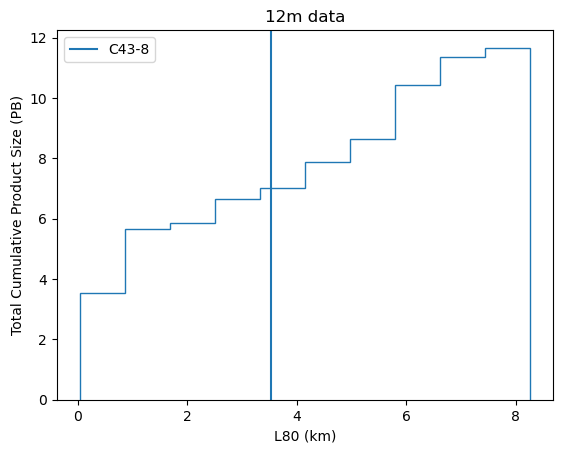

In [23]:
## by setting the weights to the value in PB, we can get the cumulative sum over all the data. 
## Note that the max value agrees with the 11.72PB calculated earlier.
idx = wsu_all['array'] == '12m'
plt.hist(wsu_all[idx]['L80'].to('km').value,
        weights=wsu_all[idx]['wsu_productsize_early_stepped2'].to('PB').value, 
        cumulative=True,density=False,histtype='step',align='mid')
plt.axvline(3.5273,label='C43-8')
plt.xlabel('L80 (km)')
plt.ylabel('Total Cumulative Product Size (PB)')
plt.title('12m data')
plt.legend(loc='upper left')

Figuring the relative amount of product size generated for configurations C43-8 and above

In [28]:
idx = wsu_all['L80'].to('km') >3.5*u.km
np.sum(wsu_all[idx]['wsu_productsize_early_stepped2'].to('PB'))

<Quantity 4.86191162 Pbyte>

In [27]:
np.sum(wsu_all['wsu_productsize_early_stepped2'].to('PB'))

<Quantity 11.72654901 Pbyte>

(array([5.06e+03, 7.30e+01, 2.30e+01, 1.10e+01, 9.00e+00, 5.00e+00,
        6.00e+00, 2.00e+00, 1.00e+00, 2.00e+00]),
 array([1.11360000e-03, 7.55609474e+02, 1.51121783e+03, 2.26682620e+03,
        3.02243456e+03, 3.77804292e+03, 4.53365128e+03, 5.28925964e+03,
        6.04486800e+03, 6.80047636e+03, 7.55608472e+03]),
 <BarContainer object of 10 artists>)

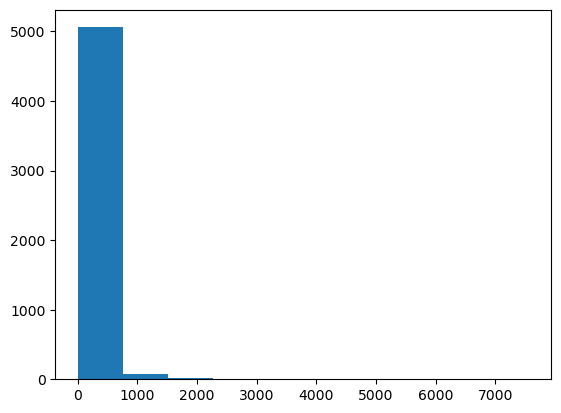

In [10]:
plt.hist(wsu_all['wsu_cubesize_initial_stepped2'].value )

In [11]:
idx = wsu_all['wsu_cubesize_initial_stepped2'] > 100.0 * u.GB
len(wsu_all[idx]['wsu_cubesize_initial_stepped2'])


464

In [12]:
len(wsu_all)

5192

In [13]:
460./5192.0


0.08859784283513097

In [14]:
idx = wsu_all['wsu_cubesize_initial_stepped2'] < 100.0 * u.GB
np.sum(wsu_all['wsu_productsize_initial_stepped2'][idx]).to('PB')/2.0

<Quantity 0.17972939 Pbyte>

In [15]:
np.sum(wsu_all['wsu_productsize_initial_stepped2']).to('PB')/2.0

<Quantity 2.23651879 Pbyte>

In [16]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

In [29]:
(np.nansum(wsu_all['mitigatedprodsize']).to('TB')/2.0)*.65

<Quantity 64.29703855 Tbyte>

In [31]:
idx = wsu_all['wsu_cubesize_initial_stepped2'] < 250.0 * u.GB
np.sum(wsu_all['wsu_productsize_initial_stepped2'][idx]).to('TB')/2.0

<Quantity 411.76899197 Tbyte>

In [33]:
np.max(wsu_all['wsu_nchan_spw_stepped2_initial'])

<Quantity 29629.>

In [35]:
np.max(wsu_all['wsu_nchan_spw_stepped2'])

<Quantity 74074.>